In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import copy
from math import sqrt,ceil

from rope.base.oi.soa import analyze_module
from scipy.stats import linregress
import libraries as lib

In [31]:
directory = "../../../OneDrive - HvA/Logfiles/H2A/2022/20220628-20220701_race_nogaro/0023 - 20220701T141014 1h8m8s 13.336km Nogaro/"
file = "1.csv"

In [32]:
data_file = lib.DataInladen(f'{directory}{file}')

In [33]:
data_file

,Datalogger port,"Dataloggertijd, in s",Format header (>08|03),NMEA type($GPRMC),Tijd,Status,Latitude,Noord of Zuid (N/S),Longitude,Oost of West (E/W),...,Mode indicator (A),Data in balancers,DegreesTrue,T,DegreesMagnetic,M,Snelheid tenopzichte van het water in Knots,N,Snelheid tenopzichte van het water in Kilometers,K
0,1,70.8626,08|03,$GPRMC,120813.0,V,0.0000,N,0.0000,E,...,N,1100000011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,71.8578,08|03,$GPRMC,120814.0,V,0.0000,N,0.0000,E,...,N,1100000011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,72.8577,08|03,$GPRMC,120815.0,V,0.0000,N,0.0000,E,...,N,1100000011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,73.8609,08|03,$GPRMC,120816.0,V,0.0000,N,0.0000,E,...,N,1100000011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,74.8585,08|03,$GPRMC,120817.0,V,0.0000,N,0.0000,E,...,N,1100000011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4200,1,4276.0450,08|03,$GPRMC,131818.0,A,4346.3114,N,2.5422,W,...,A,1100000011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4201,1,4277.0633,08|03,$GPRMC,131819.0,A,4346.3114,N,2.5422,W,...,A,1100000011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4202,1,4278.0288,08|03,$GPRMC,131820.0,A,4346.3114,N,2.5422,W,...,A,1100000011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4203,1,4279.0253,08|03,$GPRMC,131821.0,A,4346.3114,N,2.5422,W,...,A,1100000011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
'''Filtering the data so it's only the laps we want to analyze'''
data_file = data_file[data_file[xas] != 0]
data_file = data_file[data_file[yas] != 0]
data_file

,Datalogger port,"Dataloggertijd, in s",Format header (>08|03),NMEA type($GPRMC),Tijd,Status,Latitude,Noord of Zuid (N/S),Longitude,Oost of West (E/W),...,Mode indicator (A),Data in balancers,DegreesTrue,T,DegreesMagnetic,M,Snelheid tenopzichte van het water in Knots,N,Snelheid tenopzichte van het water in Kilometers,K
122,1,192.8997,08|03,$GPRMC,121014.895,A,4346.2924,N,2.5397,W,...,A,1100000011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,1,193.9149,08|03,$GPRMC,121016.000,A,4346.2915,N,2.5403,W,...,A,1100000011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,1,194.9040,08|03,$GPRMC,121017.000,A,4346.2889,N,2.5416,W,...,A,1100000011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,1,195.9052,08|03,$GPRMC,121018.000,A,4346.2857,N,2.5432,W,...,A,1100000011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,1,196.9250,08|03,$GPRMC,121019.000,A,4346.2846,N,2.5439,W,...,A,1100000011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4200,1,4276.0450,08|03,$GPRMC,131818.000,A,4346.3114,N,2.5422,W,...,A,1100000011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4201,1,4277.0633,08|03,$GPRMC,131819.000,A,4346.3114,N,2.5422,W,...,A,1100000011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4202,1,4278.0288,08|03,$GPRMC,131820.000,A,4346.3114,N,2.5422,W,...,A,1100000011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4203,1,4279.0253,08|03,$GPRMC,131821.000,A,4346.3114,N,2.5422,W,...,A,1100000011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


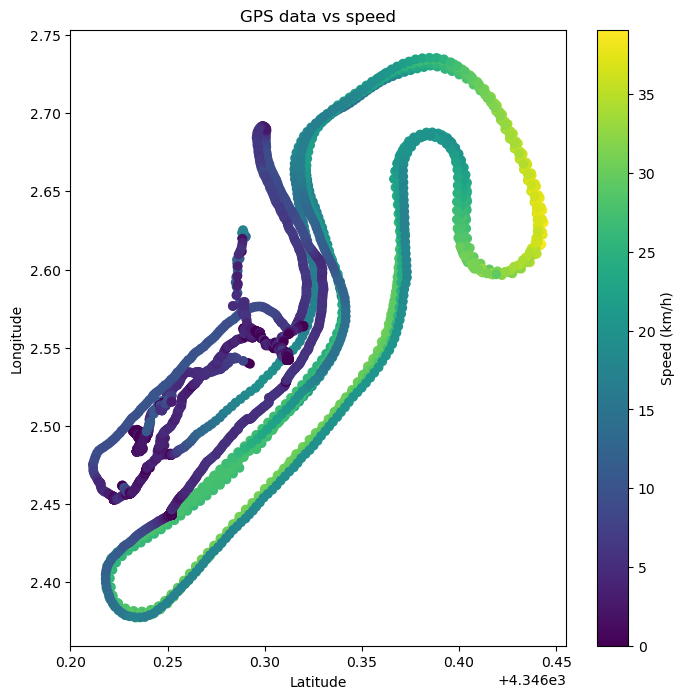

In [40]:
'Plotting the race'
plt.figure(figsize=(8,8))
plt.scatter(data_file['Latitude'], data_file['Longitude'], c=data_file['Snelheid over de grond in km/h'], cmap='viridis')
plt.title('GPS data vs speed')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

# Adding a colorbar with a label for the speed in km/h
cbar = plt.colorbar()
cbar.set_label('Speed (km/h)')

plt.show()
